# Loan Repayment Prediction

#Import Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#Read the dataset to object 'loans'

In [4]:
loans = pd.read_csv("D:\Swathi\BE\III\V\AI\project\loan_data.csv")

In [5]:
#Describe the data 

In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#Data analysis

Text(0.5, 0, 'FICO')

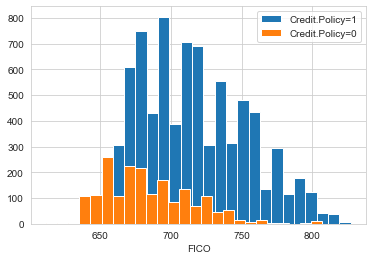

In [9]:
sns.set_style('whitegrid')
plt.hist(loans['fico'].loc[loans['credit.policy']==1], bins=25, label='Credit.Policy=1')
plt.hist(loans['fico'].loc[loans['credit.policy']==0], bins=25, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

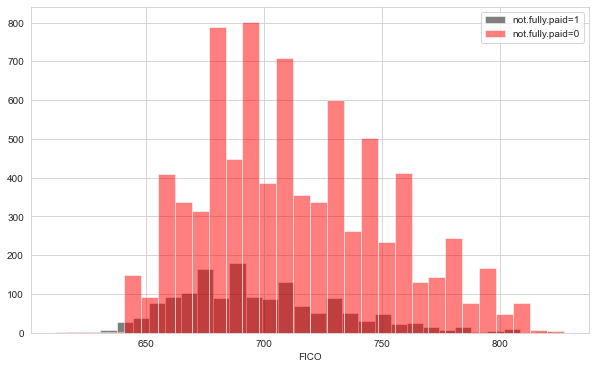

In [10]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='black', label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='red', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

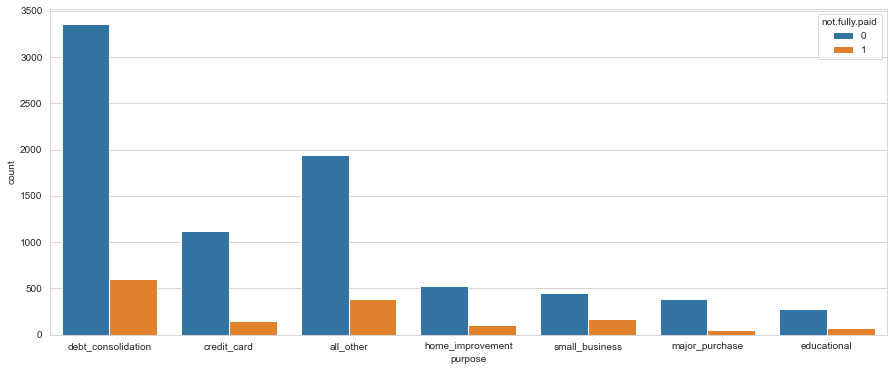

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid')

<Figure size 1080x1440 with 0 Axes>

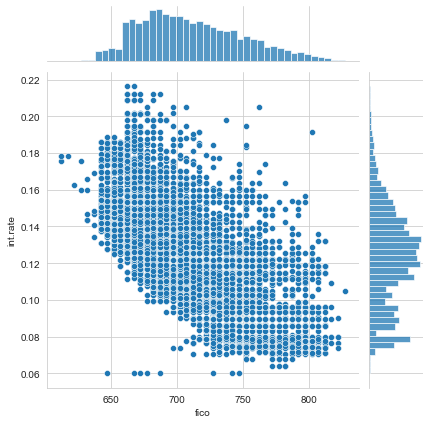

In [12]:
plt.figure(figsize=(15,20))
sns.jointplot(x='fico', y='int.rate', data=loans)

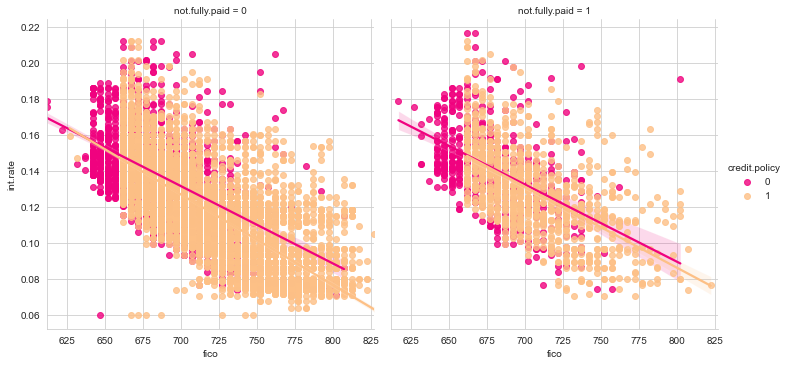

In [13]:
sns.lmplot(data=loans, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Accent_r')

#Data pre-processing

In [14]:
purpose_c = pd.get_dummies(loans['purpose'], drop_first=True)
loans_f = pd.concat([loans, purpose_c], axis=1).drop('purpose', axis=1)
loans_f.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [15]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [16]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#Data analysis continued

<AxesSubplot:>

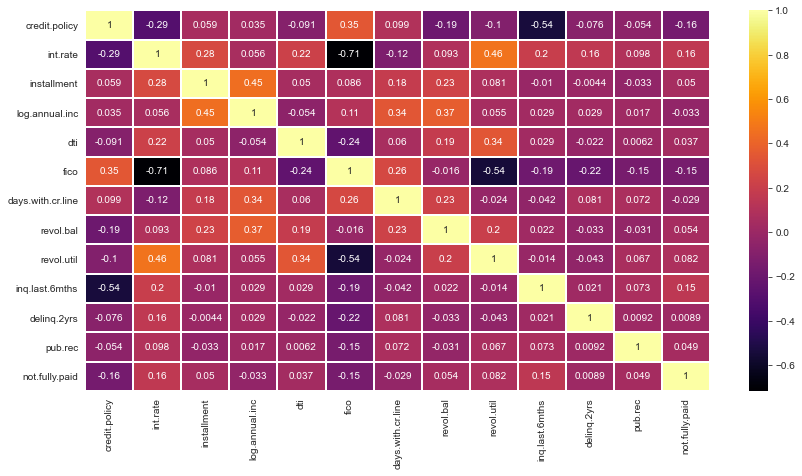

In [17]:
plt.figure(figsize=(14,7))
sns.heatmap(loans.corr(),annot=True,cmap='inferno',linewidths=1)

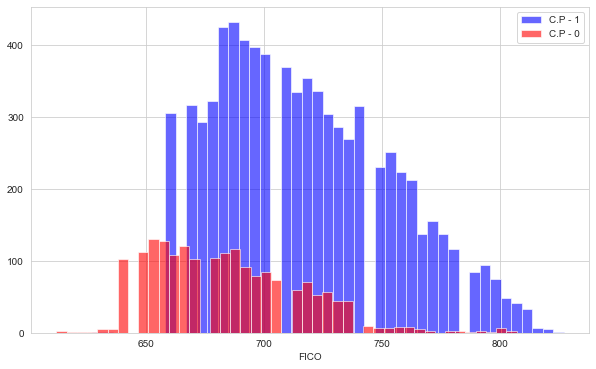

In [18]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=45,color='blue',label='C.P - 1',alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=45,color='red',label='C.P - 0',alpha=0.6)
plt.xlabel("FICO")
plt.legend()

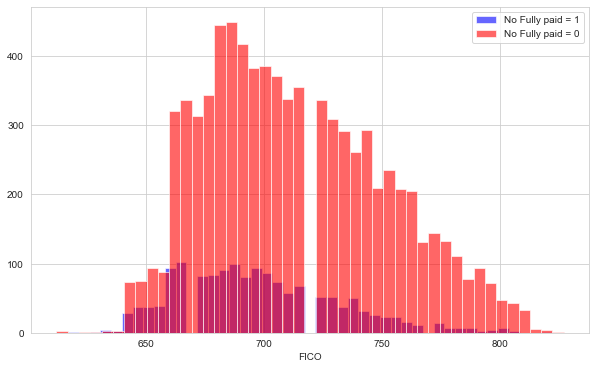

In [19]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=45,color='blue',label='No Fully paid = 1',alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=45,color='red',label='No Fully paid = 0',alpha=0.6)
plt.xlabel("FICO")
plt.legend()

Text(0, 0.5, 'Count of not.fully.paid')

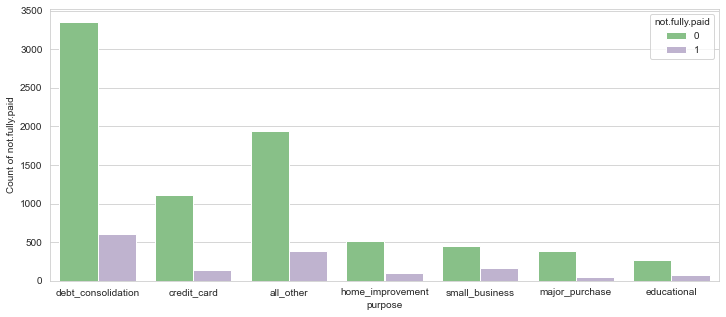

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(x='purpose',hue="not.fully.paid",data=loans,palette='Accent')
plt.ylabel("Count of not.fully.paid")

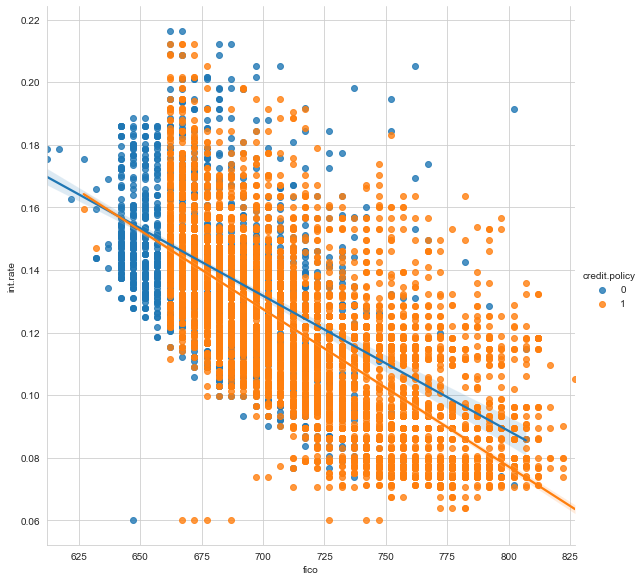

In [21]:
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',height=8)

#Further data cleaning

In [22]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [23]:
purpose_categories = pd.get_dummies(loans['purpose'],drop_first=True)

In [24]:
loans_final = pd.concat([loans,purpose_categories],axis=1)

In [25]:
loans_final.drop(['purpose'],axis=1,inplace=True)

#Splitting of datasets into training and testing dataset

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = loans_final.drop('not.fully.paid',axis=1)
y = loans_final['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)

print(X_test)

      credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
1460              1    0.1020       485.42       10.315597  12.87   752   
3130              1    0.1284       605.13       11.205041   7.69   717   
8717              0    0.0800       141.02       10.166006   1.43   767   
3776              1    0.1347       203.54       10.341742  20.25   702   
2542              1    0.1347       232.37       11.512925  11.62   687   
...             ...       ...          ...             ...    ...   ...   
6390              1    0.1287       168.17       11.407565  22.43   677   
7369              1    0.1099       589.24       11.314133  22.82   717   
9008              0    0.2011        65.14        9.903488   2.40   667   
5146              1    0.0859       158.06       10.596635   7.62   802   
5852              1    0.1322       507.01       11.775290   8.36   697   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
1460        5789.958

#  Model - decision tree classification 

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtc = DecisionTreeClassifier()

In [30]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
predictions = dtc.predict(X_test)
print(predictions)

[0 0 0 ... 0 1 1]


In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(y_test)
print("\t\t\tCLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions))

1460    0
3130    0
8717    0
3776    0
2542    0
       ..
6390    0
7369    0
9008    0
5146    0
5852    0
Name: not.fully.paid, Length: 3832, dtype: int64
			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3241
           1       0.21      0.25      0.23       591

    accuracy                           0.74      3832
   macro avg       0.53      0.54      0.53      3832
weighted avg       0.76      0.74      0.75      3832



In [34]:
print("CONFUSION MATRIX:\n")
print(confusion_matrix(y_test,predictions))

CONFUSION MATRIX:

[[2673  568]
 [ 444  147]]


#  Model - Random forest classification

In [35]:
 from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier()

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
predictions2 = rfc.predict(X_test)
print(predictions2)

[0 0 0 ... 0 0 0]


In [39]:
print(y_test)
print("\t\t\tCLASSIFICATION REPORT:\n")
print(classification_report(y_test,predictions2))

1460    0
3130    0
8717    0
3776    0
2542    0
       ..
6390    0
7369    0
9008    0
5146    0
5852    0
Name: not.fully.paid, Length: 3832, dtype: int64
			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3241
           1       0.45      0.02      0.03       591

    accuracy                           0.85      3832
   macro avg       0.65      0.51      0.47      3832
weighted avg       0.79      0.85      0.78      3832



In [40]:
print("CONFUSION MATRIX:\n")
print(confusion_matrix(y_test,predictions))

CONFUSION MATRIX:

[[2673  568]
 [ 444  147]]


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7359081419624217

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions2)

0.8452505219206681